In [12]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [68]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [69]:
from tensorflow.keras.datasets import cifar100

In [70]:
# Load the CIFAR-100 dataset

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

In [71]:
# Confirm that reloading the dataset does not require a download

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

#### Examine the Dataset

In [72]:
# Examine the shape of the data.

print(train_images.shape)
print(test_images.shape)

print(train_labels.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


[41]


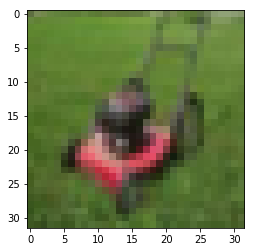

In [73]:
# Examine one of the images and its corresponding label

idx = 500

plt.imshow(train_images[idx])
print(train_labels[idx])


In [74]:
# Load the list of labels from a JSON file

import json

with open('data/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [75]:
# Print a few of the labels

print(type(cifar100_fine_labels))

print(cifar100_fine_labels.index('baby'))
print(cifar100_fine_labels.index('bear'))
cifar100_fine_labels[:6]

<class 'list'>
2
3


['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed']

In [76]:
# Print the corresponding label for the example above

cifar100_fine_labels[41]

'lawn_mower'

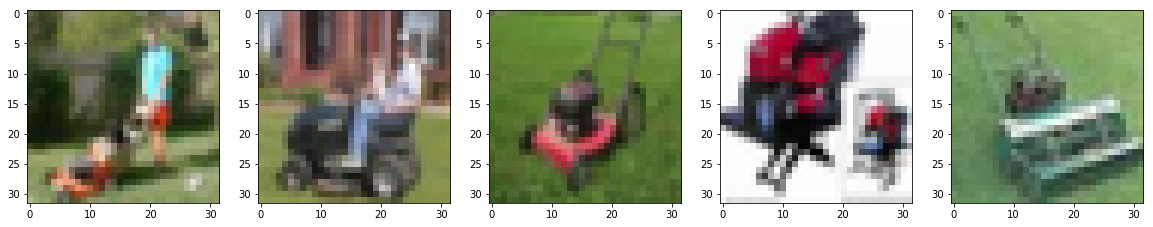

In [77]:
idxs = np.where(train_labels==41)[0]

plt.figure(figsize=(20,10))

for n in range(5):
    ax = plt.subplot(1,5, n+1)
    idx = idxs[n]
    ax.imshow(train_images[idx])

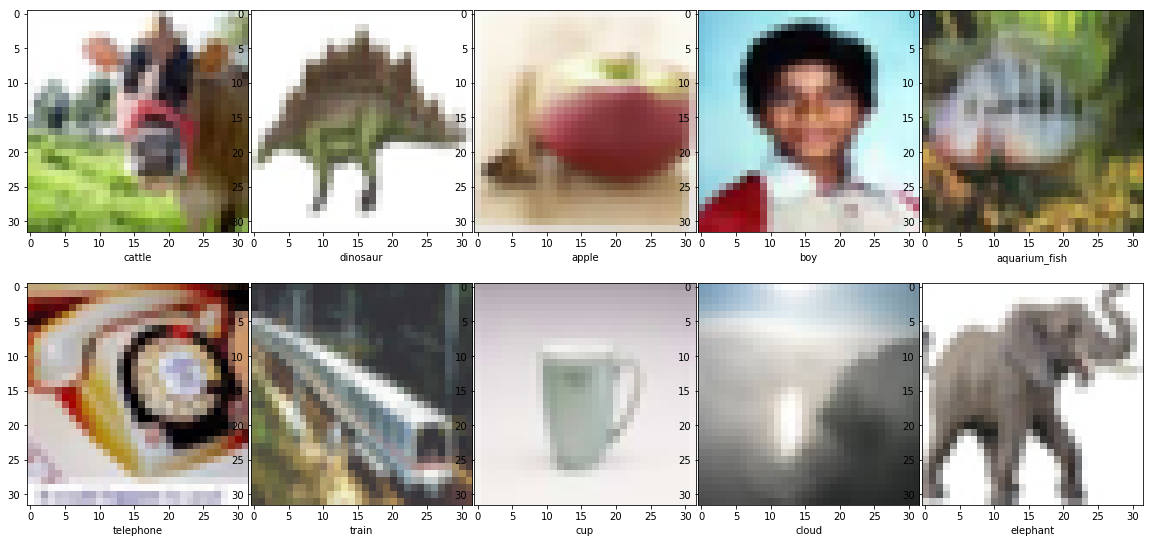

In [78]:
plt.figure(figsize=(20,10))

for n in range(10):
    ax = plt.subplot(2,5, n+1)
    ax.imshow(train_images[n])
    label = cifar100_fine_labels[train_labels[n][0]]
    ax.set_xlabel(label)
    
plt.subplots_adjust(wspace=0.01, hspace=0.01)

#### Load the data using different label modes

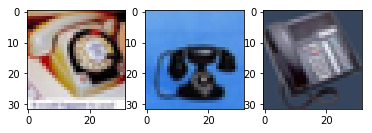

In [79]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_images[(train_labels.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [80]:
# Reload the data using the 'coarse' label mode

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='coarse')

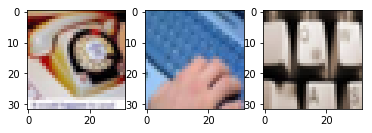

In [81]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [82]:
# Load the list of coarse labels from a JSON file

with open('data/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [83]:
# Print a few of the labels

cifar100_coarse_labels[:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [91]:
# Print the corresponding label for the example above

print(cifar100_fine_labels[86])
print(cifar100_coarse_labels[5])

telephone
household electrical device


#### Load the IMDB Dataset

In [92]:
from tensorflow.keras.datasets import imdb

In [93]:
# Load the IMDB dataset

(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


In [97]:
# Print an example from the training dataset, along with its corresponding label

print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [98]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [100]:
# Determine the maximum and minimum sequence length

print(np.min(sequence_lengths))
print(np.max(sequence_lengths))

11
2494


#### Using Keyword Arguments

In [101]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)

# oov_char is the out of value character
# this is the character used to replace the skipped words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(skip_top=50, oov_char=2)

In [102]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [103]:
# Determine the maximum and minimum sequence length

print(np.min(sequence_lengths))
print(np.max(sequence_lengths))

# this is the same as before 
# because the oov_char replaced the skipped words

11
2494


In [105]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [106]:
# Remove the oov_char from the sequences using the filter_list function

train_data = filter_list(train_data)

In [107]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [108]:
# Determine the maximum and minimum sequence length

print(np.min(sequence_lengths))
print(np.max(sequence_lengths))

3
1648


***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

In [91]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('data/fertility_diagnosis.txt', delimiter=',', header=None, names=headers)

In [92]:
# Print the shape of the DataFrame

fertility.shape

(100, 10)

In [93]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [94]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [95]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [96]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [97]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [98]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.50,1.0,0.0,0.0,1.0,0.8,0.0,0.31,0.0
1,-1.00,0.78,1.0,0.0,1.0,0.0,1.0,-1.0,0.25,0.0
2,-1.00,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,0.0
3,1.00,0.64,1.0,0.0,1.0,0.0,1.0,-1.0,0.38,0.0
4,1.00,0.81,1.0,0.0,0.0,0.0,1.0,-1.0,0.38,0.0


In [99]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [100]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.50,1.0,0.0,0.0,1.0,0.8,0.0,0.31,0.0,0,1,0,0
1,0.78,1.0,0.0,1.0,0.0,1.0,-1.0,0.25,0.0,1,0,0,0
2,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,0.0,1,0,0,0
3,0.64,1.0,0.0,1.0,0.0,1.0,-1.0,0.38,0.0,0,0,0,1
4,0.81,1.0,0.0,0.0,0.0,1.0,-1.0,0.38,0.0,0,0,0,1


*N.B. The below cell has been updated since the coding tutorial.*

In [101]:
# Move the Output column such that it is the last column in the DataFrame

fertility = fertility.reindex(columns = [col for col in fertility.columns if col != 'Output'] + ['Output'])

In [102]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.50,1.0,0.0,0.0,1.0,0.8,0.0,0.31,0,1,0,0,0.0
1,0.78,1.0,0.0,1.0,0.0,1.0,-1.0,0.25,1,0,0,0,0.0
2,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,1,0,0,0,0.0
3,0.64,1.0,0.0,1.0,0.0,1.0,-1.0,0.38,0,0,0,1,0.0
4,0.81,1.0,0.0,0.0,0.0,1.0,-1.0,0.38,0,0,0,1,0.0


In [103]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()

In [104]:
fertility

array([[0.5 , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.78, 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.53, 1.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.58, 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.53, 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.61, 1.  , 0.  , ..., 0.  , 1.  , 0.  ]], dtype=float32)

#### Split the Data

In [105]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [106]:
# Verify the shape of the training data

print(training.shape)
print(validation.shape)

(70, 13)
(30, 13)


In [107]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

In [108]:
print(len(training_features))

70


#### Create the Generator

In [109]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        lower_idx = n*batch_size
        upper_idx = (n+1)*batch_size
        
        yield (features[lower_idx: upper_idx], labels[lower_idx: upper_idx])

In [110]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [111]:
# Test the generator using the next() function

data = next(train_generator)
print(data)
print(f'shape: {data[0].shape}')


(array([[ 0.5 ,  1.  ,  0.  ,  0.  ,  1.  ,  0.8 ,  0.  ,  0.31,  0.  ,
         1.  ,  0.  ,  0.  ],
       [ 0.78,  1.  ,  0.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.25,  1.  ,
         0.  ,  0.  ,  0.  ],
       [ 0.53,  1.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.31,  1.  ,
         0.  ,  0.  ,  0.  ],
       [ 0.64,  1.  ,  0.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.38,  0.  ,
         0.  ,  0.  ,  1.  ],
       [ 0.81,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.38,  0.  ,
         0.  ,  0.  ,  1.  ],
       [ 0.69,  1.  ,  0.  ,  0.  ,  1.  ,  1.  , -1.  ,  0.31,  0.  ,
         0.  ,  1.  ,  0.  ],
       [ 0.75,  1.  ,  0.  ,  1.  ,  0.  ,  0.8 , -1.  ,  0.44,  0.  ,
         0.  ,  1.  ,  0.  ],
       [ 0.53,  1.  ,  1.  ,  1.  ,  0.  ,  0.8 ,  1.  ,  0.5 ,  1.  ,
         0.  ,  0.  ,  0.  ],
       [ 0.75,  1.  ,  1.  ,  1.  ,  0.  ,  0.6 ,  1.  ,  0.25,  0.  ,
         1.  ,  0.  ,  0.  ],
       [ 0.69,  1.  ,  0.  ,  1.  ,  0.  ,  0.8 , -1.  ,  0.25,  0.  ,
         0.  ,  0. 

#### Build the model

In [112]:
# Create a model using Keras with 3 layers

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,) # there are 12 features
output_shape = (1,)

model_input = Input(input_shape)
batch_1     = BatchNormalization(momentum=0.8)(model_input)
dense_1     = Dense(100, activation='relu')(batch_1)
batch_2     = BatchNormalization(momentum=0.8)(dense_1)
output      = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [113]:
# Display the model summary to show the resultant structure

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1300      
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,849
Trainable params: 1,625
Non-trainable params: 224
_________________________________________________________________


#### Compile the model

In [114]:
# Create the optimizer object

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [115]:
# Compile the model with loss function and metric

model.compile(optimizer=adam_optimizer, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [116]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size
print(train_steps)

14


In [117]:
# Set the epochs to 3

epochs = 3

In [118]:
# Train the model

for epoch in range(epochs):
    train_generator = get_generator(training_features, training_labels, batch_size=batch_size)
    validation_generator = get_generator(validation_features, validation_labels, batch_size=30)
    
    model.fit_generator(train_generator, steps_per_epoch=train_steps, validation_data=validation_generator, validation_steps=1)

14/14 [==============================] - 1s 45ms/step - loss: 0.0525 - accuracy: 1.0000 - val_loss: 1.0083 - val_accuracy: 0.6667


In [119]:
# Try to run the fit_generator function once more; observe what happens

# model.fit_generator(train_generator, steps_per_epoch=train_steps)

#### Make an infinitely looping generator

In [120]:
np.random.permutation(len(training_features))

array([44, 27,  0,  1, 57, 40, 11,  9, 15, 59, 10, 18, 23,  7, 49, 52, 17,
       61, 32,  8, 69, 29, 24, 54, 33, 55,  5, 38,  2, 12, 66, 48,  6, 39,
        4, 43, 25, 30, 35, 56, 46, 31, 60, 63, 36, 14, 64, 19, 51, 22, 53,
       26, 58, 21, 65, 41, 13, 47, 16, 37, 68, 45, 20, 50, 28,  3, 62, 67,
       42, 34])

In [121]:
# Create a function that returns an infinitely looping generator


    
        
def get_generator_cyclic(features, labels, batch_size=1):
    while True: 
        for n in range(int(len(features)/batch_size)):
            lower_idx = n*batch_size
            upper_idx = (n+1)*batch_size

            yield (features[lower_idx: upper_idx], labels[lower_idx: upper_idx])
        
        # shuffle the data
        permutation = np.random.permutation(len(features))
        features = features[permutation]
        labels = labels[permutation]
        

In [122]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [123]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    next(train_generator_cyclic)

In [124]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [125]:
# Train the model

model.fit_generator(train_generator_cyclic, steps_per_epoch=train_steps, 
                    validation_data=validation_generator_cyclic, validation_steps=1,
                   epochs=3)

Epoch 1/3
14/14 [==============================] - 1s 44ms/step - loss: 0.2655 - accuracy: 0.8857 - val_loss: 1.1490 - val_accuracy: 0.6000
Epoch 2/3
14/14 [==============================] - 1s 45ms/step - loss: 0.1938 - accuracy: 0.9000 - val_loss: 0.0330 - val_accuracy: 1.0000
Epoch 3/3
14/14 [==============================] - 1s 41ms/step - loss: 0.1563 - accuracy: 0.9000 - val_loss: 1.6843 - val_accuracy: 0.8000


#### Evaluate the model and get predictions

In [126]:
# Let's obtain a validation data generator.

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [127]:
# Get predictions on the validation data

predictions = model.predict_generator(validation_generator, steps=1)
print(np.round(predictions.T[0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0.]


In [128]:
# Print the corresponding validation labels

print(validation_labels)

[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [129]:
# Obtain a validation data generator

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [130]:
# Evaluate the model

print(model.evaluate(validation_generator))

1/1 [==============================] - 0s 283ms/step - loss: 1.4335 - accuracy: 0.7000
[1.4334551095962524, 0.7]


***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

In [131]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the CIFAR-10 Dataset

In [132]:
from tensorflow.keras.datasets import cifar10

In [133]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [142]:
print(type(training_labels))
print(f'Shape: {training_labels.shape}')
print(f'Number of dimensions: {training_labels.ndim}')
print(training_labels)

<class 'numpy.ndarray'>
Shape: (50000, 1)
Number of dimensions: 2
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [143]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

In [145]:
print(type(training_labels))
print(f'Shape: {training_labels.shape}')
print(f'Number of dimensions: {training_labels.ndim}')
print(training_labels)
print(training_labels[0]) # 6

<class 'numpy.ndarray'>
Shape: (50000, 10)
Number of dimensions: 2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Create a generator function

In [148]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    n_data = len(features)
    for n in range(int(n_data/batch_size)):
        lower_idx = n*batch_size
        upper_idx = (n+1)*batch_size
        yield (features[lower_idx: upper_idx], labels[lower_idx: upper_idx])

In [149]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [150]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


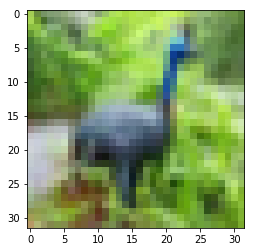

In [157]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [158]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmention generator

In [159]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [166]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [167]:
# Create an ImageDataGenerator object

image_generator = ImageDataGenerator(
    preprocessing_function=monochrome,
    rotation_range=180,
    rescale=(1/255.))

image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [168]:
# Create an iterable generator using the `flow` function

image_generator_iterable = image_generator.flow(training_features, training_labels, 
                                               batch_size=1, shuffle=False)

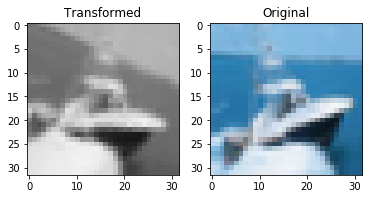

In [177]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)

figs, axes = plt.subplots(1,2)

axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')

axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

In [191]:
%ls data/flowers-recognition-split/train

daisy/  dandelion/  rose/  sunflower/  tulip/


In [188]:
# Inspect the directory structure

train_path = 'data/flowers-recognition-split/train'
val_path = 'data/flowers-recognition-split/val'

In [192]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [193]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [ ]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [204]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(train_path, batch_size=64, classes=classes, target_size=(16,16))

Found 3027 images belonging to 5 classes.


In [205]:
# Create a validation data generator

val_generator = datagenerator.flow_from_directory(val_path, batch_size=64, classes=classes, target_size=(16,16))

Found 1296 images belonging to 5 classes.


[1. 0. 0. 0. 0.]


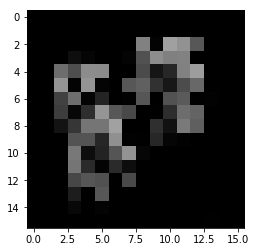

In [206]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

In [251]:
# n = val_generator.n

# for i in range(val_generator.n):
#     print ("Complete: ", i/n * 100, "%    ", end="\r")
#     next(val_generator)

In [238]:
# Reset the training generator

train_generator = datagenerator.flow_from_directory(train_path, batch_size=64, classes=classes, target_size=(16,16))

Found 3027 images belonging to 5 classes.


#### Create a model to train

In [239]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((16,16,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [240]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [241]:
# Compile the model

model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [242]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 16, 16, 8)         1544      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           4104      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 4)           516       
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)               

#### Train the model

In [243]:
%ls data/flowers-recognition-split/train

daisy/  dandelion/  rose/  sunflower/  tulip/


In [244]:
# number of jpg files == number of training examples
%ls -R data/flowers-recognition-split/train/ | grep ".jpg" | wc -l
print(train_generator.n)

3027
3027


In [245]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

47 20


In [252]:
# Fit the model

model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch, epochs=5)
#                    validation_data=val_generator, validation_steps=val_steps)


Epoch 1/5
47/47 [==============================] - 30s 631ms/step - loss: 1.4161 - accuracy: 0.3635
Epoch 2/5
47/47 [==============================] - 25s 530ms/step - loss: 1.3789 - accuracy: 0.3760
Epoch 3/5
47/47 [==============================] - 25s 530ms/step - loss: 1.3701 - accuracy: 0.3780
Epoch 4/5
47/47 [==============================] - 25s 536ms/step - loss: 1.3460 - accuracy: 0.3959
Epoch 5/5
47/47 [==============================] - 25s 532ms/step - loss: 1.3459 - accuracy: 0.3831


#### Evaluate the model

In [248]:
# Evaluate the model

model.evaluate_generator(val_generator, steps=val_steps)

[1.4306446313858032, 0.36484376]

#### Predict using the generator

In [247]:
# Predict labels with the model

predictions = model.predict_generator(val_generator, steps=1)
print(np.round(predictions, 2))

[[0.29 0.38 0.1  0.09 0.14]
 [0.06 0.04 0.31 0.22 0.38]
 [0.08 0.08 0.25 0.24 0.36]
 [0.34 0.46 0.06 0.06 0.08]
 [0.22 0.25 0.16 0.15 0.22]
 [0.21 0.26 0.16 0.16 0.21]
 [0.08 0.07 0.24 0.24 0.37]
 [0.16 0.18 0.2  0.19 0.27]
 [0.32 0.46 0.07 0.06 0.1 ]
 [0.07 0.06 0.24 0.24 0.39]
 [0.3  0.38 0.09 0.09 0.14]
 [0.12 0.13 0.22 0.22 0.31]
 [0.32 0.54 0.04 0.04 0.05]
 [0.35 0.51 0.04 0.04 0.06]
 [0.07 0.02 0.61 0.12 0.18]
 [0.07 0.06 0.27 0.23 0.37]
 [0.27 0.34 0.12 0.11 0.16]
 [0.2  0.24 0.17 0.16 0.23]
 [0.26 0.34 0.12 0.11 0.17]
 [0.31 0.4  0.09 0.08 0.12]
 [0.32 0.45 0.07 0.07 0.1 ]
 [0.19 0.24 0.17 0.16 0.23]
 [0.34 0.53 0.04 0.04 0.05]
 [0.12 0.13 0.22 0.21 0.32]
 [0.26 0.35 0.12 0.11 0.16]
 [0.32 0.42 0.08 0.07 0.11]
 [0.28 0.34 0.11 0.11 0.16]
 [0.16 0.18 0.2  0.19 0.27]
 [0.33 0.55 0.04 0.03 0.05]
 [0.34 0.5  0.05 0.04 0.07]
 [0.32 0.49 0.06 0.06 0.08]
 [0.35 0.54 0.03 0.03 0.05]
 [0.34 0.53 0.04 0.04 0.05]
 [0.17 0.18 0.19 0.19 0.28]
 [0.31 0.65 0.01 0.01 0.02]
 [0.32 0.6  0.02 0.0

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

#### Create a simple dataset

In [5]:
x = np.zeros((100,10,2,2))

In [29]:
# Create a dataset from the tensor x

dataset1 = tf.data.Dataset.from_tensor_slices(x)
dataset_variation = tf.data.Dataset.from_tensor_slices([x])

In [30]:
# Inspect the Dataset object

print(dataset1.element_spec)
print(dataset_variation.element_spec)

TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)
TensorSpec(shape=(100, 10, 2, 2), dtype=tf.float64, name=None)


In [10]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [21]:
# Try creating a dataset from the tensor x2

#this will throw an error because we have different number
# of batch sizes - the batch size is determined 
# by the first dimension, in this case 10 and 5
dataset2 = tf.data.Dataset.from_tensor_slices([x2])

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [23]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [35]:
# Create another dataset from the new x2 and inspect the Dataset object

dataset2 = tf.data.Dataset.from_tensor_slices(x2)

In [36]:
# Print the element_spec

# there are 3 batches, however element_spec only shows the specs of the individual elements
print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


#### Create a zipped dataset

In [37]:
# Combine the two datasets into one larger dataset

dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))

In [38]:
# Print the element_spec

print(dataset_zipped.element_spec)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [39]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [40]:
# Find the number of batches in the zipped Dataset

get_batches(dataset_zipped)

3

#### Create a dataset from numpy arrays

In [41]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [45]:
# Create a Dataset from the MNIST data

mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [46]:
# Inspect the Dataset object

# because we passed a tuple, we are expecting to get info about a tuple
print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [47]:
# Inspect the length of an element using the take method

element = next(iter(mnist_dataset.take(1)))
print(len(element)) # length of 2 - corresponding to the image and label

2


In [49]:
# Examine the shapes of the data

print(element[0].shape)
print(element[1].shape)

(28, 28)
()


In [42]:
# what happens if we do not put the data in a tuple when creating the dataset?
# we get an error, from_tensor_slices expects a single positional argument for
# the data, therefore we need to put all the data into a tuple
mnist_dataset = tf.data.Dataset.from_tensor_slices(train_features, train_labels)

TypeError: from_tensor_slices() takes 1 positional argument but 2 were given

In [51]:
# what about an array
# mnist_dataset = tf.data.Dataset.from_tensor_slices([train_features, train_labels])

In [54]:
# more playing
# x = (np.zeros((10,2,2)), np.zeros((5,2,2)))
# dummy = tf.data.Dataset.from_tensor_slices(x)

#### Create a dataset from text data

In [55]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('data/shakespeare')])

print(text_files)

['data/shakespeare/tempest.1.1.txt', 'data/shakespeare/tempest.1.2.txt', 'data/shakespeare/tempest.2.1.txt', 'data/shakespeare/tempest.2.2.txt', 'data/shakespeare/tempest.3.1.txt', 'data/shakespeare/tempest.3.2.txt', 'data/shakespeare/tempest.3.3.txt', 'data/shakespeare/tempest.4.1.txt', 'data/shakespeare/tempest.5.1.txt']


In [56]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. On a ship at sea: a tempestuous noise

of thunder and lightning heard.

Enter a Master and a Boatswain



Master



In [58]:
# help(tf.data.TextLineDataset)

In [59]:
# Load the lines from the files into a dataset using TextLineDataset

shakespeare_dataset = tf.data.TextLineDataset(text_files)

In [61]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]

for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [64]:
# Compute the number of lines in the first file

lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

121


In [68]:
print(type(shakespeare_dataset))
print(type(iter(shakespeare_dataset)))

<class 'tensorflow.python.data.ops.readers.TextLineDatasetV2'>
<class 'tensorflow.python.data.ops.iterator_ops.IteratorV2'>


In [65]:
# Compute the number of lines in the shakespeare dataset we created

shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

3134


A problem arises with our previous method of loading text files: 
The text files, an thus each of the lines in the files, are loaded sequentially.

What if we want to get text lines from different files in random order?

First we are going to create a dataset from the file names.
Then use its interleave method. It accepts a mapping function and a cycle_length parameter. In this case out mapping function will be tf.data.TextLineDataset. The cycle_length is the number of datasets to interleave together, which in this case is 9 because we have 9 files.

#### Interleave lines from the text data files

In [72]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'data/shakespeare/tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.3.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.4.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.5.1.txt', shape=(), dtype=string)


In [73]:
# Interleave the lines from the text files

interleaved_shakespeare_dataset = text_files_dataset.interleave(tf.data.TextLineDataset, cycle_length=9)
print(interleaved_shakespeare_dataset.element_spec)

TensorSpec(shape=(), dtype=tf.string, name=None)


In [74]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

#### Load the UCI Bank Marketing Dataset

In [34]:
# Load the CSV file into a pandas DataFrame

bank_dataframe = pd.read_csv('data/bank/bank-full.csv', delimiter=';')

In [35]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [36]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

(45211, 17)


In [37]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [38]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [39]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))

In [40]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,"(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 1, 0)","(0,)",2143,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
1,44,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",single,"(0, 1, 0, 0)","(0,)",29,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
2,33,"(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 1, 0, 0)","(0,)",2,"(1,)","(1,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
3,47,"(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 0, 1)","(0,)",1506,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
4,33,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)",single,"(0, 0, 0, 1)","(0,)",1,"(0,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no


*N.B. The below cell has been updated to correct the name of a variable and differs from the Coding Tutorial video.*

In [41]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

*N.B. Please use ``bank_dataframe.to_dict(orient='list')`` to convert the correct dataframe to a dictionary suitable for use in the ``from_tensor_slices`` function, rather than ``dict(dataframe)`` as specified in the coding tutorial video.*

In [42]:
# Convert the DataFrame to a Dataset

bank_dict = bank_dataframe.to_dict(orient='list')
bank_dataset = tf.data.Dataset.from_tensor_slices(bank_dict)

In [43]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}

#### Filter the Dataset

In [44]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

Found a person with marital status: b'single'


In [45]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [46]:
# Check the records in the dataset again

check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [49]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'

def map_label(x):
    x['y'] = 1 if tf.equal(x['y'], tf.constant(b'yes')) else 0
    return x

bank_dataset = bank_dataset.map(map_label)

In [50]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [53]:
print(type(bank_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>


In [51]:
# Remove the 'marital' column

bank_dataset = bank_dataset.map(lambda x: {key: val for key, val in x.items() if key != 'marital'})

In [52]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [54]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [55]:
# Map this function over the dataset

bank_dataset = bank_dataset.map(map_feature_label)

In [56]:
# Inspect the Dataset object

bank_dataset.element_spec

(TensorSpec(shape=(30,), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

#### Split into a training and a validation set

In [57]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

5207


In [68]:
# Make training and validation sets from the dataset

training_elements = int(dataset_length * 0.7)
train_dataset = bank_dataset.take(training_elements)
validation_dataset = bank_dataset.skip(training_elements)

#### Build a classification model

Now let's build a model to classify the features.

In [69]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [70]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [71]:
# Show the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 30)                120       
_________________________________________________________________
dense_3 (Dense)              (None, 400)               12400     
_________________________________________________________________
batch_normalization_4 (Batch (None, 400)               1600      
_________________________________________________________________
dense_4 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_5 (Batch (None, 400)               1600      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 401       
Total params: 176,521
Trainable params: 174,861
Non-trainable params: 1,660
____________________________________________

#### Train the model

In [72]:
# Create batched training and validation datasets

train_dataset = train_dataset.batch(20, drop_remainder=True)
validation_dataset = validation_dataset.batch(100)

In [73]:
# Shuffle the training data

train_dataset = train_dataset.shuffle(1000)

In [74]:
# Fit the model

history = model.fit(train_dataset, validation_data=validation_dataset, epochs=5)

Epoch 1/5
182/182 [==============================] - 31s 170ms/step - loss: 0.6668 - accuracy: 0.6448 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
182/182 [==============================] - 25s 137ms/step - loss: 0.4782 - accuracy: 0.8247 - val_loss: 0.4721 - val_accuracy: 0.8490
Epoch 3/5
182/182 [==============================] - 27s 148ms/step - loss: 0.3728 - accuracy: 0.8896 - val_loss: 0.4097 - val_accuracy: 0.8714
Epoch 4/5
182/182 [==============================] - 27s 149ms/step - loss: 0.3025 - accuracy: 0.9187 - val_loss: 0.3820 - val_accuracy: 0.8746
Epoch 5/5
182/182 [==============================] - 25s 140ms/step - loss: 0.2563 - accuracy: 0.9234 - val_loss: 0.3712 - val_accuracy: 0.8714


Text(0.5, 1.0, 'Accuracy vs. Epochs')

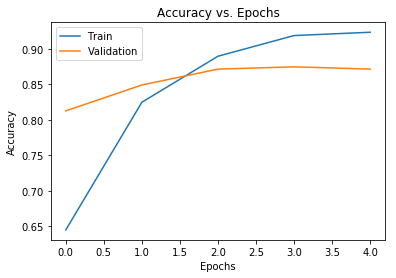

In [87]:
# Plot the training and validation accuracy
# plt.figure(figsize=(20,10))

plt.plot(history.epoch, history.history['accuracy'], label='Train')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
